# Python Bootcamp - University of Athens - Fall 2019

## Spyros Nikolakis & Dimitrios Roussis - Exercise 2

Before presenting the 2 scripts of the 2nd exercise, we define two necessary functions; one is the Recursive implementation of the Edit Distance algorithm and the other one is the Dynamic programming implementation.

In [1]:
def edit_distance_r(s, t):
    """
    Minimum Edit Distance Algorithm - Recursive implementation: 
    This function calculates the minimunm cost which is needed in order to
    convert string "s" to string "t". However, it does so recursively and 
    is very inefficient computationally
    """
    
    if s == "":
        return len(t)
    if t == "":
        return len(s)
    if s[-1] == t[-1]:
        cost = 0
    else:
        cost = 1
    
    res = min([edit_distance_r(s, t[:-1]) + 1,
              edit_distance_r(s[:-1], t) + 1,
              edit_distance_r(s[:-1], t[:-1]) + cost])
    return res

In [2]:
import numpy as np

def edit_distance_m(s, t):
    """
    Minimum Edit Distance Algorithm - Dynamic Programming implementation:
    This function calculates the minimunm cost which is needed in order to
    convert string "s" to string "t". However, it does so in a 
    computationally efficient manner  as it utilizes numpy arrays 
    and dynamic programming
    """
    
    size_x = len(s) + 1
    size_y = len(t) + 1
    matrix = np.zeros((size_x, size_y))
    
    for x in range(size_x):
        matrix[x, 0] = x
    for y in range(size_y):
        matrix[0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if s[x-1] == t[y-1]:
                matrix[x, y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix[x, y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1] + 1,
                    matrix[x, y-1] + 1
                )
    return (matrix[size_x - 1, size_y - 1])

## Script 1 - Top 10 Similar Pairs

This is the first part of exercise 2, in which we read two files (dnalist1.txt & dnalist2.txt), calculate the similarity scores for every line d1 of the first and every line d2 of the second and print those scores in descending order.

In [3]:
# Read files and store in memory
file1 = open('dnalist1.txt')

file1_contents = []
for line in file1:
    file1_contents.append(line.rstrip("\n"))
    
file1.close()

file2 = open('dnalist2.txt')

file2_contents = []
for line in file2:
    file2_contents.append(line.rstrip("\n"))

file2.close()

# Calculate distances, percentages and generate tuples to store the info
distances_percentage_couples = []
line1_id = 0
for line1 in file1_contents:
    line1_id += 1
    line2_id = 0
    for line2 in file2_contents:            
        line2_id += 1
        line_length = len(line2)
        # Calculate percentage: ((line_length - distance) / line_length) * 100
        distance_percentage = (int(line_length - edit_distance_m(line1, line2)) / line_length) * 100
        distances_percentage_couples.append((line1_id, line2_id, distance_percentage))    

distances_percentage_couples.sort(key=lambda x: x[2], reverse = True) # Sort results in descending order

limit = 10 # Print top 10 results
counter = 0
for distance_couple in distances_percentage_couples:
    if counter == limit:
        break
    # Limit every similarity score to 1 decimal point    
    print('Reference Line: ' + str(distance_couple[0]) 
          + ', Sequence Line: ' + str(distance_couple[1]) 
          + ', Similarity: %.1f' % distance_couple[2] + '%')
    counter += 1

Reference Line: 55, Sequence Line: 76, Similarity: 62.0%
Reference Line: 29, Sequence Line: 5, Similarity: 60.0%
Reference Line: 92, Sequence Line: 53, Similarity: 60.0%
Reference Line: 11, Sequence Line: 83, Similarity: 58.0%
Reference Line: 13, Sequence Line: 6, Similarity: 58.0%
Reference Line: 85, Sequence Line: 83, Similarity: 58.0%
Reference Line: 5, Sequence Line: 100, Similarity: 56.0%
Reference Line: 11, Sequence Line: 66, Similarity: 56.0%
Reference Line: 16, Sequence Line: 27, Similarity: 56.0%
Reference Line: 20, Sequence Line: 48, Similarity: 56.0%


## Script 2 - Comparison of the Edit Distance algorithms

This is the second part of exercise 2. We start by defining the two functions which we will use below. For more information about each one, please refer to its documentation.

In [4]:
import random

def dna_sequence_generator(num, length, name):
    """
    Creates an output file "name.txt" (defined by user) which contains
    a random DNA sequence (made of bases A, T, G & C) which spans vertically
    across the number of lines defined by user (num) and in each line,
    horizontally across the line length -or size- defined by user (length)
    """
    
    line_num = num
    line_length = length
    filename = name
    chars = ['A', 'T', 'G', 'C']
    g = open(filename, 'w')
    for line in range(line_num):
        random_line = ''
        for c in range(line_length):
            random_letter = random.choice(chars)
            random_line += random_letter
        random_line += '\n'
        g.write(random_line)
    g.close()

In [5]:
import time

def extract_and_time_edit_dist(name_1, name_2, method):
    """
    This function takes the names of two files as input, opens them and calculates the time
    of execution of the Edit Distance Algorithm between each line (line_1) of file 1 (name_1) 
    and each line (line_2) of file 2 (name_2). The method which is used is specified by the user:
    "dyn" for Dynamic Programming and "rec" for the Recursive implementation. 
    Otherwise, the algorithm stops and an error is raised
    """
    file_1 = open(name_1, 'r')
    file_2 = open(name_2, 'r')
    
    start = time.time()
    for line_1 in file_1:
        for line_2 in file_2:
            start = time.time()
            if method == 'dyn':
                edit_distance_m(line_1, line_2)
            elif method == 'rec':
                edit_distance_r(line_1, line_2)
            else:
                try:
                    raise KeyboardInterrupt
                finally: 
                    print('Error: Set method to "rec" for Recursive or "dyn" for Dynamic programming')
            
    end = time.time()
    
    elapsed_time = end - start
    file_1.close()
    file_2.close()
    return elapsed_time

At this point, we are going to make use of the functions we defined above, by choosing the arguments which have been specified by the instructors of the Python Bootcamp. More specifically:
- In order to test the execution time of the *Recursive implementation of the Edit Distance algorithm*, we generate two .txt files with **two lines** of random DNA strings, which have a **varying length/size of 1 up to 10**. Then we extract all the lines from the files and calculate the elapsed time as the time that the Edit Distance algorithm takes to execute **between each line of file 1 and each line of file 2 (4 times for each line length)**. We then save these into a list.
- We do the same for the *Dynamic programming implementation of the Edit Distance algorithm*, although we **change the variability in the length/size of the DNA string to a range of 1 up to 20**.

In [6]:
recursive_times = []
dynamic_times = []

# Generate 2 lines of random DNA strings with a size changing from 1 to 10 (for all lines)
for i in range(1, 11):
    dna_sequence_generator(2, i, 'file1.txt')
    dna_sequence_generator(2, i, 'file2.txt')
    elapsed_time = extract_and_time_edit_dist('file1.txt', 'file2.txt', 'rec') # Time Recursive Algorithm
    recursive_times.append(elapsed_time)
    
# Generate 2 lines of random DNA strings with a size changing from 1 to 20 (for all lines)
for i in range(1, 21):
    dna_sequence_generator(2, i, 'file1.txt')
    dna_sequence_generator(2, i, 'file2.txt')
    elapsed_time = extract_and_time_edit_dist('file1.txt', 'file2.txt', 'dyn') # Time Dynamic Algorithm
    dynamic_times.append(elapsed_time)

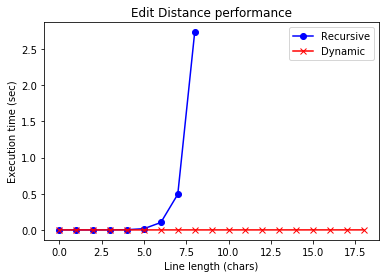

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(recursive_times, color='blue', marker='o', linestyle='solid', label='Recursive') 
plt.plot(dynamic_times, color='red', marker='x', linestyle='solid', label='Dynamic') 
plt.title('Edit Distance performance')
plt.legend()
plt.ylabel('Execution time (sec)')
plt.xlabel('Line length (chars)')
plt.show()

From the figure above, we can see that *there could be* a linear relation between the length of the lines and the execution time of the Edit Distance algorithm with Dynamic Programming (see Bonus script for relation between the number of the lines and the execution time); however, it is so much more computationally efficient than the Recursive implementation that any increase in its execution time **is not visible at this scale**.

On the contrary, the execution time of the Recursive implementation of the Edit Distance algorithm **clearly exhibits an exponential increase as the length of the lines increases**. To further validate this, we use a logarithmic scale for the execution time (y-axis) in the figure below. We expect to see a large steepness exhibited by the Recursive implementation line, with every point belonging to a different scale.

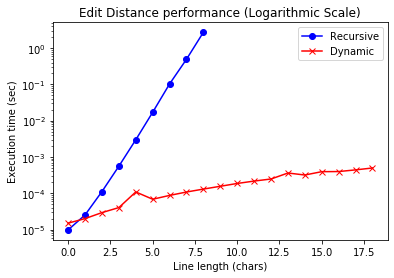

In [8]:
plt.plot(recursive_times, color='blue', marker='o', linestyle='solid', label='Recursive') 
plt.plot(dynamic_times, color='red', marker='x', linestyle='solid', label='Dynamic') 
plt.title('Edit Distance performance (Logarithmic Scale)')
plt.legend()
plt.ylabel('Execution time (sec)')
plt.xlabel('Line length (chars)')
plt.yscale('log')
plt.show()

In the second figure, we do see that, for the Recursive implementation, each **singular increase in line length** increases the time of execution by -a little bit less than- **an order of magnitude**. Moreover, we can see that the execution time of the Dynamic implementation also increases; all of the points in the plot, however, **belong within two orders of magnitude**.

## Bonus Script - Behavior of the Dynamic programming implementation
**IMPORTANT:** Part of this script was originally written for the first version of Exercise 2; however there are some notable changes. Its execution takes around 10 seconds.

At this point, we test the Edit Distance algorithm (Dynamic Programming) once more; this time, though, we want to calculate the time of executing the algorithm for files containing a **number of lines** (spanning vertically) **equal to a specific power of 10** (num = 1, 10, 100, 1000, 10000, 100000). The execution time is measured **between each line of each file with each line of every other file**.

The resulting visualizations will hopefully give us useful insights about the rate of increase in execution times of the Dynamic Programming implementation of the Edit Distance Algorithm. 

In [9]:
from math import log10

dna_lines_range = [10 ** j for j in range(0, 6)] # 10e0 = 1 up to 10e5 = 100000
dynamic_times_nest = []
index = 0 
dynamic_times = []
#dynamic_times_nest.append([]) # Here we use a nested list
for j in dna_lines_range: # For a number of lines equal to different powers of 10
    dna_sequence_generator(j, 1, 'no_of_strings_10e{0}.txt'.format(int(log10(j))))
    elapsed_time_sum = 0
    for k in dna_lines_range:
        dna_sequence_generator(k, 1, 'no_of_strings_10e{0}.txt'.format(int(log10(k))))
        elapsed_time = extract_and_time_edit_dist('no_of_strings_10e{0}.txt'.format(int(log10(j))),
                                                  'no_of_strings_10e{0}.txt'.format(int(log10(k))),
                                                  'dyn') # Time Dynamic Algorithm
        elapsed_time_sum += elapsed_time
    #dynamic_times_nest[index].append(elapsed_time)
    dynamic_times.append(elapsed_time_sum)
    index += 1 # We use k as index for the nested list, as j does not take sequential values

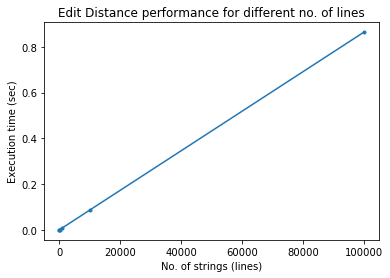

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline 

x = dna_lines_range
y = dynamic_times
plt.plot(x, y, marker='.', linestyle='solid')
plt.title('Edit Distance performance for different no. of lines')
plt.xlabel('No. of strings (lines)')
plt.ylabel('Execution time (sec)')
plt.show()

In the figure above, we can clearly see that the execution time of the Dynamic implementation of the Edit Distance algorithm increases **proportionally** with the number of lines that the file has. This is no surprise at all; however, it is useful to note that **the number of lines increase by an order of magnitude** for such an effect to take place. 

In order to better visualize the results, so that all the points are visible, we set the y-axis (No. of lines) in logarithmic scale.

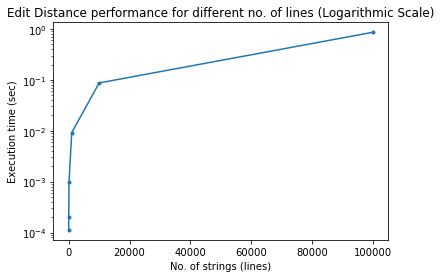

In [11]:
x = dna_lines_range
y = dynamic_times
plt.plot(x, y, marker='.', linestyle='solid')
plt.title('Edit Distance performance for different no. of lines (Logarithmic Scale)')
plt.xlabel('No. of strings (lines)')
plt.ylabel('Execution time (sec)')
plt.yscale('log')
plt.show()

What the figure above demonstrates, is that for **the first two powers of 10** (10e0 = 1 & 10e1 = 10), the execution time is **essentially the same**. Afterwards, each increase of **one order of magnitude** in the number of lines within a file, corresponds -roughly- to an increase of **one order of magnitude** in the execution time as well. Thus, we can fairly conclude that the Dynamic programming implementation of the Edit Distance algorithm, **behaves linearly after a certain point**.